<a href="https://colab.research.google.com/github/shoyell/lecture_pytorch/blob/master/lecture2/exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 演習
第2講の演習です。  
PyTorchを使ってモデルを構築し、最適化アルゴリズムを設定しましょう。


## データを訓練用とテスト用に分割

In [1]:
import torch
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits_data = datasets.load_digits()

digit_images = digits_data.data
labels = digits_data.target
x_train, x_test, t_train, t_test = train_test_split(digit_images, labels)  # 25%がテスト用

# Tensorに変換
x_train = torch.tensor(x_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.int64)
x_test = torch.tensor(x_test, dtype=torch.float32)
t_test = torch.tensor(t_test, dtype=torch.int64)

## モデルの構築
`nn`モジュールの`Sequential`クラスを使い、`print(net)`で以下のように表示されるモデルを構築しましょう。
```
Sequential(
  (0): Linear(in_features=64, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)
```

In [2]:
from torch import nn

net = nn.Sequential(
    # ------- ここからコードを記述 -------
    nn.Linear(64, 128),  # 全結合層
    nn.ReLU(),          # ReLU
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
    # ------- ここまで -------
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)


## 学習
モデルを訓練します。  
最適化アルゴリズムの設定をしましょう。  
最適化アルゴリズムは、以下のページから好きなものを選択してください。  
https://pytorch.org/docs/stable/optim.html




In [3]:
from torch import optim

# 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

# 最適化アルゴリズム
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)  # ここにコードを記述

# 損失のログ
record_loss_train = []
record_loss_test = []

# 1000エポック学習
for i in range(1000):

    # 勾配を0に
    optimizer.zero_grad()

    # 順伝播
    y_train = net(x_train)
    y_test = net(x_test)

    # 誤差を求める
    loss_train = loss_fnc(y_train, t_train)
    loss_test = loss_fnc(y_test, t_test)
    record_loss_train.append(loss_train.item())
    record_loss_test.append(loss_test.item())

    # 逆伝播（勾配を求める）
    loss_train.backward()

    # パラメータの更新
    optimizer.step()

    if i%100 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train.item(), "Loss_Test:", loss_test.item())

Epoch: 0 Loss_Train: 2.4289441108703613 Loss_Test: 2.478217840194702
Epoch: 100 Loss_Train: 0.018999770283699036 Loss_Test: 0.09019021689891815
Epoch: 200 Loss_Train: 0.0035770460963249207 Loss_Test: 0.09907952696084976
Epoch: 300 Loss_Train: 0.0013531518634408712 Loss_Test: 0.10637106001377106
Epoch: 400 Loss_Train: 0.0007110260776244104 Loss_Test: 0.11263937503099442
Epoch: 500 Loss_Train: 0.00043924100464209914 Loss_Test: 0.11736748367547989
Epoch: 600 Loss_Train: 0.0002994067035615444 Loss_Test: 0.12181813269853592
Epoch: 700 Loss_Train: 0.00021728377032559365 Loss_Test: 0.12527181208133698
Epoch: 800 Loss_Train: 0.00016420694009866565 Loss_Test: 0.12835517525672913
Epoch: 900 Loss_Train: 0.00012834944936912507 Loss_Test: 0.13162681460380554


## 誤差の推移

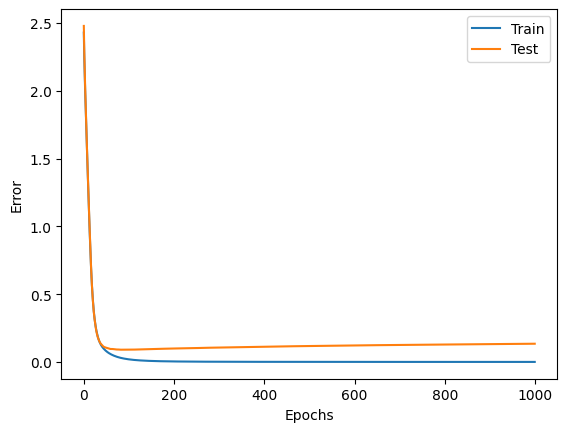

In [4]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

## 正解率

In [5]:
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print("正解率:", str(count/len(y_test)*100) + "%")

正解率: 97.55555555555556%


# 解答例
以下は、どうしても手がかりがないときのみ参考にしましょう。

In [6]:
from torch import nn

net = nn.Sequential(
    # ------- ここからコードを記述 -------
    nn.Linear(64, 128),  # 全結合層
    nn.ReLU(),          # ReLU
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
    # ------- ここまで -------
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)


In [7]:
from torch import optim

# 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

# 最適化アルゴリズム
optimizer = optim.Adam(net.parameters())  # ここにコードを記述

# 損失のログ
record_loss_train = []
record_loss_test = []

# 1000エポック学習
for i in range(1000):

    # 勾配を0に
    optimizer.zero_grad()

    # 順伝播
    y_train = net(x_train)
    y_test = net(x_test)

    # 誤差を求める
    loss_train = loss_fnc(y_train, t_train)
    loss_test = loss_fnc(y_test, t_test)
    record_loss_train.append(loss_train.item())
    record_loss_test.append(loss_test.item())

    # 逆伝播（勾配を求める）
    loss_train.backward()

    # パラメータの更新
    optimizer.step()

    if i%100 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train.item(), "Loss_Test:", loss_test.item())

Epoch: 0 Loss_Train: 2.611046552658081 Loss_Test: 2.5935375690460205
Epoch: 100 Loss_Train: 0.022348076105117798 Loss_Test: 0.09904319047927856
Epoch: 200 Loss_Train: 0.004434056114405394 Loss_Test: 0.09025117009878159
Epoch: 300 Loss_Train: 0.0017930896719917655 Loss_Test: 0.0896683931350708
Epoch: 400 Loss_Train: 0.0009655406465753913 Loss_Test: 0.08954504877328873
Epoch: 500 Loss_Train: 0.0006017369451001287 Loss_Test: 0.08983321487903595
Epoch: 600 Loss_Train: 0.0004105234402231872 Loss_Test: 0.0901024341583252
Epoch: 700 Loss_Train: 0.0002978482225444168 Loss_Test: 0.09032756090164185
Epoch: 800 Loss_Train: 0.0002255379076814279 Loss_Test: 0.0908738523721695
Epoch: 900 Loss_Train: 0.00017644994659349322 Loss_Test: 0.09167127311229706
